In [1]:
#Import various useful libraries
import pandas as pd
import numpy as np

import datetime as dt
import datetime

from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sql_con = "sqlite:///../database/ufc_data.db"
con = create_engine(sql_con)

In [3]:
train_df = pd.read_sql("SELECT * FROM train_df_v3", con)

In [4]:
train_df.columns

Index(['fighter_1', 'fighter_2', 'date', 'results', 'f1_ufc_draw',
       'f1_ufc_loss', 'f1_ufc_nc', 'f1_ufc_win', 'f1_height', 'f1_weight',
       'f1_reach', 'f1_stance', 'f1_dob', 'f1_total_fights', 'f1_all_win',
       'f1_all_loss', 'f1_all_draw', 'f1_ufc_total_fights', 'f1_cum_rnd',
       'f1_cum_ftime', 'f1_cum_strikes', 'f1_cum_td', 'f1_cum_sub',
       'f2_cum_rnd', 'f2_cum_ftime', 'f2_cum_strikes', 'f2_cum_td',
       'f2_cum_sub', 'f1_stpm', 'f1_tdpm', 'f1_subpm', 'f2_stpm', 'f2_tdpm',
       'f2_subpm', 'f1_win_streak', 'f1_loss_streak', 'f2_ufc_draw',
       'f2_ufc_loss', 'f2_ufc_nc', 'f2_ufc_win', 'f2_height', 'f2_weight',
       'f2_reach', 'f2_stance', 'f2_dob', 'f2_total_fights', 'f2_all_win',
       'f2_all_loss', 'f2_all_draw', 'f2_ufc_total_fights', 'f2_win_streak',
       'f2_loss_streak', 'd_ufc_draw', 'd_ufc_loss', 'd_ufc_nc', 'd_ufc_win',
       'd_height', 'd_weight', 'd_reach', 'd_stance', 'd_dob', 'd_all_win',
       'd_all_loss', 'd_all_draw', 'd_ufc_tota

In [5]:
train_df = train_df.drop(columns=['date','fighter_1','fighter_2'])

In [6]:
train_df.head()

,results,f1_ufc_draw,f1_ufc_loss,f1_ufc_nc,f1_ufc_win,f1_height,f1_weight,f1_reach,f1_stance,f1_dob,...,d_cum_rnd,d_cum_ftime,d_cum_strikes,d_cum_td,d_cum_sub,d_stpm,d_tdpm,d_subpm,d_win_streak,d_loss_streak
0,loss,0.0,0.0,0.0,0.0,177.800003,95.254517,187.452002,1,1978.352941,...,0.0,0.0,13.0,0.0,0.0,120.963883,14.023335,13.91227,0,0
1,loss,0.0,0.0,0.0,0.0,177.800003,95.254517,187.452002,1,1978.352941,...,0.0,0.0,13.0,0.0,0.0,120.963883,14.023335,13.91227,0,-1
2,loss,0.0,0.0,0.0,0.0,177.800003,95.254517,187.452002,1,1978.352941,...,0.0,0.0,13.0,0.0,0.0,120.963883,14.023335,13.91227,-1,0
3,loss,0.0,0.0,0.0,0.0,177.800003,95.254517,187.452002,1,1978.352941,...,0.0,0.0,13.0,0.0,0.0,120.963883,14.023335,13.91227,-2,0
4,loss,0.0,0.0,0.0,1.0,182.880005,95.254517,187.452002,1,1978.352941,...,-1.0,0.0,1.0,0.0,1.0,60.000000,0.000000,60.00000,0,0


## Experiments using Pycaret

In [7]:
from pycaret.classification import *

In [8]:
#Setup environment
clf = setup(data = train_df,target='results')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,7460
1,Target Type,Binary
2,Label Encoded,"loss: 0, win: 1"
3,Original Data,"(11447, 72)"
4,Missing Values,False
5,Numeric Features,61
6,Categorical Features,10
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [9]:
#Compare models
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.663900,0.728300,0.665600,0.658700,0.662100,0.327700
1,Gradient Boosting Classifier,0.655900,0.718700,0.662100,0.649800,0.655800,0.311800
2,Light Gradient Boosting Machine,0.655400,0.715400,0.652500,0.651600,0.652000,0.310700
3,Extreme Gradient Boosting,0.653600,0.718100,0.656600,0.648400,0.652400,0.307300
4,Ada Boost Classifier,0.636400,0.691700,0.636700,0.631700,0.634100,0.272800
5,Extra Trees Classifier,0.629900,0.686600,0.610400,0.630400,0.620200,0.259600
6,Linear Discriminant Analysis,0.625300,0.673600,0.632600,0.618900,0.625700,0.250700
7,Ridge Classifier,0.625200,0.000000,0.632600,0.618800,0.625600,0.250500
8,Logistic Regression,0.618800,0.656400,0.622300,0.613200,0.617600,0.237700
9,Random Forest Classifier,0.608300,0.653400,0.519700,0.625800,0.567800,0.215300


In [10]:
catboost = tune_model('catboost', optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6521,0.7266,0.6650,0.6439,0.6543,0.3044
1,0.6658,0.7514,0.6297,0.6739,0.6510,0.3312
2,0.6841,0.7561,0.6768,0.6819,0.6793,0.3682
3,0.6767,0.7570,0.7146,0.6597,0.6861,0.3538
4,0.6492,0.7010,0.6439,0.6456,0.6448,0.2983
5,0.6380,0.6975,0.6465,0.6305,0.6384,0.2760
6,0.6704,0.7409,0.6625,0.6692,0.6658,0.3407
7,0.6704,0.7363,0.6826,0.6626,0.6725,0.3409
8,0.6841,0.7658,0.6751,0.6837,0.6793,0.3682
9,0.6367,0.7112,0.6272,0.6352,0.6312,0.2733


In [11]:
predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.6757,0.7436,0.689,0.667,0.6778,0.3515


,f1_ufc_draw,f1_ufc_loss,f1_ufc_win,f1_height,f1_weight,f1_reach,f1_dob,f1_total_fights,f1_all_win,f1_all_loss,...,d_loss_streak_-5,d_loss_streak_0,d_loss_streak_1,d_loss_streak_2,d_loss_streak_3,d_loss_streak_4,d_loss_streak_5,results,Label,Score
0,0.0,1.0,1.0,182.880005,83.914696,187.959991,1993.000000,15.0,12.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5293
1,0.0,4.0,6.0,170.179993,65.770973,177.800003,1982.000000,44.0,31.0,13.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.2068
2,0.0,2.0,2.0,193.039993,83.914696,193.039993,1986.000000,15.0,12.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.8654
3,0.0,0.0,0.0,193.039993,124.738060,187.452002,1985.889313,8.0,2.0,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.2979
4,0.0,2.0,5.0,190.500000,77.110802,203.199997,1987.000000,17.0,13.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.6997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3430,0.0,0.0,2.0,185.419998,90.718590,181.378415,1968.000000,44.0,28.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8706
3431,0.0,6.0,5.0,175.259995,70.306908,180.339996,1986.000000,40.0,28.0,12.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.2892
3432,0.0,3.0,3.0,185.419998,92.986549,193.039993,1990.000000,13.0,8.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.4312
3433,0.0,9.0,9.0,180.339996,77.110802,172.720001,1974.000000,53.0,31.0,17.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.3944


In [12]:
fin_catboost = finalize_model(catboost)

In [13]:
save_model(fin_catboost,'Final catboost Model 10Sep2020')

Transformation Pipeline and Model Succesfully Saved


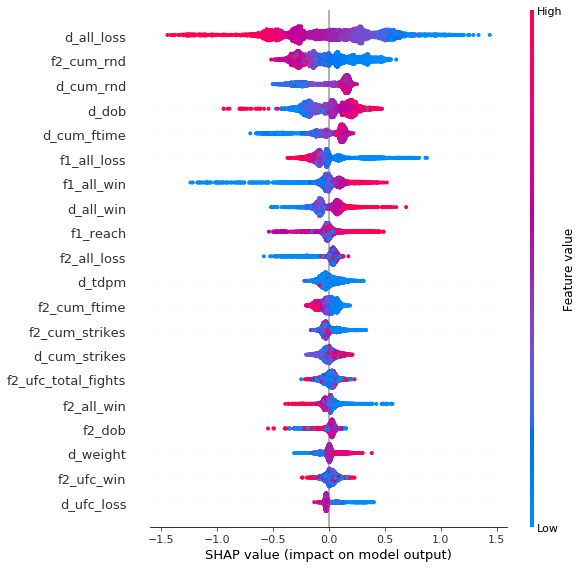

In [14]:
#Interpret model
interpret_model(catboost, plot = 'summary')